# modeling

In [1]:
import pandas as pd
import geopandas as gpd

## load data

In [2]:
train_test = gpd.read_file('../data/train_test.shp')

In [3]:
train_test.shape

(19224, 33)

In [4]:
train_test.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19224 entries, 0 to 19223
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   state       19224 non-null  object  
 1   district    19224 non-null  object  
 2   year        19224 non-null  int64   
 3   month       19224 non-null  int64   
 4   outbreak    19224 non-null  int64   
 5   sss         6254 non-null   float64 
 6   sss_1m_l    6254 non-null   float64 
 7   sss_c_1m_l  6254 non-null   float64 
 8   sss_d_1m_l  6254 non-null   float64 
 9   sss_2m_l    6254 non-null   float64 
 10  sss_c_2m_l  6254 non-null   float64 
 11  sss_d_2m_l  6254 non-null   float64 
 12  chl         7577 non-null   float64 
 13  chl_1m_l    7577 non-null   float64 
 14  chl_c_1m_l  7577 non-null   float64 
 15  chl_d_1m_l  7577 non-null   float64 
 16  chl_2m_l    7577 non-null   float64 
 17  chl_c_2m_l  7577 non-null   float64 
 18  chl_d_2m_l  7577 non-null   float64 
 

In [5]:
train_test.head()

,state,district,year,month,outbreak,sss,sss_1m_l,sss_c_1m_l,sss_d_1m_l,sss_2m_l,...,lst_2m_l,lst_c_2m_l,lst_d_2m_l,east,west,mnsn,post_mnsn,pre_mnsn,winter,geometry
0,gujarat,ahmadabad,2010,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,1,0,0,0,1,"POLYGON ((3179537.224 3816985.054, 3178528.703..."
1,gujarat,ahmadabad,2010,2,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,1,0,0,0,1,"POLYGON ((3179537.224 3816985.054, 3178528.703..."
2,gujarat,ahmadabad,2010,3,0,NaN,NaN,NaN,NaN,NaN,...,306.614266,4.415403,1.0,0,1,0,0,1,0,"POLYGON ((3179537.224 3816985.054, 3178528.703..."
3,gujarat,ahmadabad,2010,4,0,NaN,NaN,NaN,NaN,NaN,...,310.196242,4.957989,1.0,0,1,0,0,1,0,"POLYGON ((3179537.224 3816985.054, 3178528.703..."
4,gujarat,ahmadabad,2010,5,0,NaN,NaN,NaN,NaN,NaN,...,320.152522,2.264764,1.0,0,1,0,0,1,0,"POLYGON ((3179537.224 3816985.054, 3178528.703..."


In [6]:
train_test.isna().sum()

state             0
district          0
year              0
month             0
outbreak          0
sss           12970
sss_1m_l      12970
sss_c_1m_l    12970
sss_d_1m_l    12970
sss_2m_l      12970
sss_c_2m_l    12970
sss_d_2m_l    12970
chl           11647
chl_1m_l      11647
chl_c_1m_l    11647
chl_d_1m_l    11647
chl_2m_l      11647
chl_c_2m_l    11647
chl_d_2m_l    11647
lst             854
lst_1m_l        854
lst_c_1m_l      854
lst_d_1m_l      854
lst_2m_l        854
lst_c_2m_l      854
lst_d_2m_l      854
east              0
west              0
mnsn              0
post_mnsn         0
pre_mnsn          0
winter            0
geometry          0
dtype: int64

Drop districts entirely if they don't have a complete timeseries, i. e. missing values for some ecv variable?

In [7]:
train_test = train_test.dropna().reset_index(drop=True)
train_test.shape

(6054, 33)

## train test split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
districts = train_test[['district']]

In [10]:
districts.nunique()

district    59
dtype: int64

In [19]:
X = train_test.drop(['state', 'district', 'year', 'month', 'outbreak', 'geometry'], axis=1)

In [20]:
y = train_test['outbreak']

In [21]:
y.value_counts()

0    5910
1     144
Name: outbreak, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## random forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)

In [25]:
%%time

rf.fit(X_train, y_train)

CPU times: user 605 ms, sys: 65 µs, total: 605 ms
Wall time: 608 ms


RandomForestClassifier(n_estimators=50, random_state=42)

In [26]:
y_pred = rf.predict(X_test)

## evaluation

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from matplotlib import pyplot

In [28]:
print(confusion_matrix(y_test, y_pred))

[[1770    0]
 [  47    0]]


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1770
           1       0.00      0.00      0.00        47

    accuracy                           0.97      1817
   macro avg       0.49      0.50      0.49      1817
weighted avg       0.95      0.97      0.96      1817



/home/alex/anaconda3/envs/gis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alex/anaconda3/envs/gis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alex/anaconda3/envs/gis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

In [31]:
auc = roc_auc_score(y_test, y_pred_proba)

In [32]:
auc

0.570873903113355

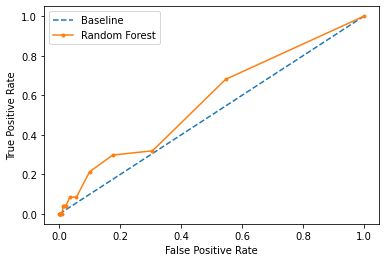

In [33]:
baseline = [0 for _ in range(len(y_test))]
baseline_auc = roc_auc_score(y_test, baseline)

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, baseline)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_proba)

pyplot.plot(baseline_fpr, baseline_tpr, linestyle='--', label='Baseline')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()

## SMOTE

In [34]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [35]:
oversample = SMOTE(sampling_strategy=0.1)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [36]:
X_train.shape

(4554, 27)

In [37]:
y_train.value_counts()

0    4140
1     414
Name: outbreak, dtype: int64

In [38]:
rf = RandomForestClassifier(n_estimators=50, random_state=42)

In [39]:
%%time

rf.fit(X_train, y_train)

CPU times: user 603 ms, sys: 15.9 ms, total: 619 ms
Wall time: 591 ms


RandomForestClassifier(n_estimators=50, random_state=42)

In [40]:
y_pred = rf.predict(X_test)

In [41]:
print(confusion_matrix(y_test, y_pred))

[[1770    0]
 [  47    0]]


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1770
           1       0.00      0.00      0.00        47

    accuracy                           0.97      1817
   macro avg       0.49      0.50      0.49      1817
weighted avg       0.95      0.97      0.96      1817



/home/alex/anaconda3/envs/gis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alex/anaconda3/envs/gis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alex/anaconda3/envs/gis/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]

In [44]:
auc = roc_auc_score(y_test, y_pred_proba)

In [45]:
auc

0.6236506791681693

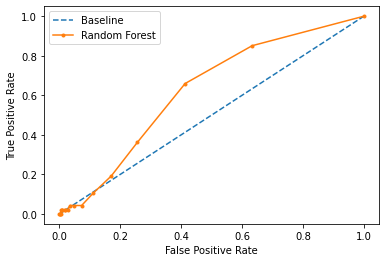

In [46]:
baseline = [0 for _ in range(len(y_test))]
baseline_auc = roc_auc_score(y_test, baseline)

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, baseline)
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_pred_proba)

pyplot.plot(baseline_fpr, baseline_tpr, linestyle='--', label='Baseline')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

pyplot.legend()

pyplot.show()